In [ ]:
#Maria Jimena Vargas López

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

!pip install -q mahotas
import mahotas
import pandas as pd
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 25.6 MB/s eta 0:00:00


Mounted at /content/drive
Clases encontradas: ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Brassica Juncea (Indian Mustard)', 'Citrus Limon (Lemon)', 'Mangifera Indica (Mango)']


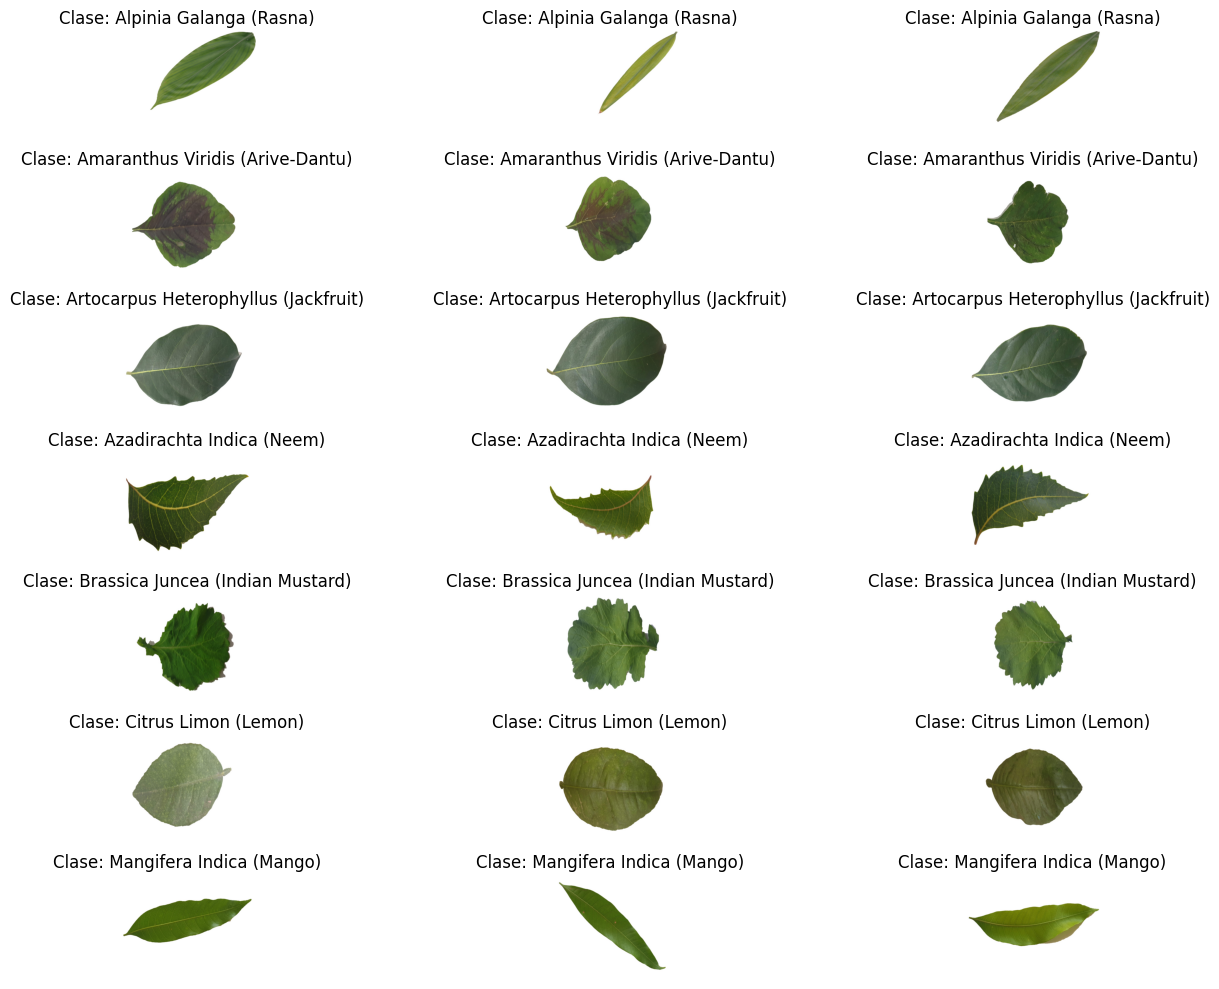

In [ ]:

# Montar Google Drive
drive.mount('/content/drive')

# Ruta de la carpeta de datos
input_path = "/content/drive/MyDrive/VISIÓN POR COMPUTADORA/DATOS"

# Obtener la lista de clases (subcarpetas)
classes = sorted(os.listdir(input_path))
print("Clases encontradas:", classes)

# Configurar matplotlib para mostrar imágenes
plt.figure(figsize=(15, 10))

# Recorrer cada clase y mostrar 3 imágenes
for i, class_name in enumerate(classes):
    class_path = os.path.join(input_path, class_name)
    images = os.listdir(class_path)[:3]  # Tomar las primeras 3 imágenes

    for j, image_name in enumerate(images):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB para matplotlib

        # Mostrar la imagen
        plt.subplot(len(classes), 3, i * 3 + j + 1)
        plt.imshow(image)
        plt.title(f"Clase: {class_name}")
        plt.axis('off')

plt.tight_layout()
plt.show()


🔍 Procesando clase: Mangifera Indica (Mango)
✅ Segmentación completa para clase: Mangifera Indica (Mango)

🔍 Procesando clase: Citrus Limon (Lemon)
✅ Segmentación completa para clase: Citrus Limon (Lemon)

🔍 Procesando clase: Alpinia Galanga (Rasna)
✅ Segmentación completa para clase: Alpinia Galanga (Rasna)

🔍 Procesando clase: Amaranthus Viridis (Arive-Dantu)
✅ Segmentación completa para clase: Amaranthus Viridis (Arive-Dantu)

🔍 Procesando clase: Artocarpus Heterophyllus (Jackfruit)
✅ Segmentación completa para clase: Artocarpus Heterophyllus (Jackfruit)

🔍 Procesando clase: Azadirachta Indica (Neem)
✅ Segmentación completa para clase: Azadirachta Indica (Neem)

🔍 Procesando clase: Brassica Juncea (Indian Mustard)
✅ Segmentación completa para clase: Brassica Juncea (Indian Mustard)


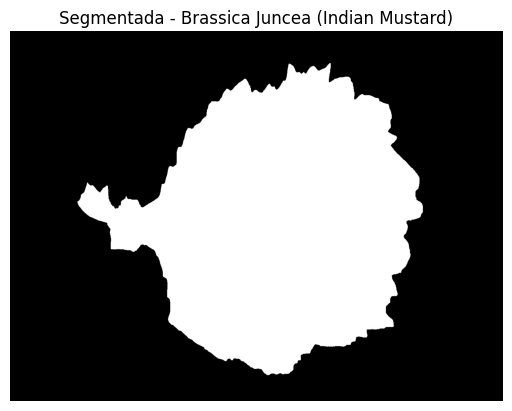

In [ ]:

# Rutas de entrada y salida
input_folder_path = '/content/drive/MyDrive/VISIÓN POR COMPUTADORA/DATOS'
output_base_path = '/content/drive/MyDrive/VISIÓN POR COMPUTADORA/SEGMENTADAS_7CLASES'

# Función para segmentar la imagen con Otsu
def segment_image(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"❌ No se pudo leer la imagen: {image_path}")
            return None

        blurred = cv2.GaussianBlur(image, (5, 5), 0)
        T = mahotas.thresholding.otsu(blurred)
        segmented = (blurred > T).astype(np.uint8) * 255
        segmented = cv2.bitwise_not(segmented)
        return segmented
    except Exception as e:
        print(f"⚠️ Error al procesar {image_path}: {e}")
        return None

# Procesamiento por clase (limón, mango)
if os.path.exists(input_folder_path):
    for class_name in os.listdir(input_folder_path):
        class_path = os.path.join(input_folder_path, class_name)

        if os.path.isdir(class_path):
            output_class_path = os.path.join(output_base_path, f"{class_name}_segmentadas")
            os.makedirs(output_class_path, exist_ok=True)
            print(f"\n🔍 Procesando clase: {class_name}")

            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

            for image_name in image_files:
                image_path = os.path.join(class_path, image_name)
                segmented = segment_image(image_path)

                if segmented is not None:
                    output_path = os.path.join(output_class_path, image_name)
                    cv2.imwrite(output_path, segmented)

            print(f"✅ Segmentación completa para clase: {class_name}")
else:
    print(f"❌ Carpeta no encontrada: {input_folder_path}")


from matplotlib import pyplot as plt

sample_image = os.path.join(output_class_path, image_files[0])
seg = cv2.imread(sample_image, cv2.IMREAD_GRAYSCALE)

plt.imshow(seg, cmap='gray')
plt.title(f"Segmentada - {class_name}")
plt.axis('off')
plt.show()

In [ ]:


# Ruta de las imágenes segmentadas
segmented_root = '/content/drive/MyDrive/VISIÓN POR COMPUTADORA/SEGMENTADAS_7CLASES'

# Lista para almacenar los momentos de Hu
hu_data = []

# Iterar sobre cada clase (limón, mango)
for class_folder in os.listdir(segmented_root):
    class_path = os.path.join(segmented_root, class_folder)

    if not os.path.isdir(class_path):
        continue

    # Procesar cada imagen
    for image_file in os.listdir(class_path):
        if not image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            continue

        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"⚠️ No se pudo leer: {image_path}")
            continue

        # Encontrar contornos
        contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if not contours:
            print(f"⚠️ No hay contornos en: {image_path}")
            continue

        # Tomar el contorno más grande
        largest_contour = max(contours, key=cv2.contourArea)

        # Calcular momentos de Hu
        moments = cv2.moments(largest_contour)
        hu_moments = cv2.HuMoments(moments)

        # Aplanar los momentos de Hu (son 7 valores)
        hu_moments_flat = [hu_moments[i][0] for i in range(7)]

        # Guardar en la lista
        hu_data.append({
            'Clase': class_folder.replace('_segmentadas', ''),
            'Imagen': image_file,
            'Hu1': hu_moments_flat[0],
            'Hu2': hu_moments_flat[1],
            'Hu3': hu_moments_flat[2],
            'Hu4': hu_moments_flat[3],
            'Hu5': hu_moments_flat[4],
            'Hu6': hu_moments_flat[5],
            'Hu7': hu_moments_flat[6]
        })

# Crear DataFrame con los momentos de Hu
df_hu = pd.DataFrame(hu_data)

# Guardar en un CSV independiente
hu_csv_path = '/content/drive/MyDrive/VISIÓN POR COMPUTADORA/Momentos_de_Hu_7_clases.csv'
df_hu.to_csv(hu_csv_path, index=False)

print(f"✅ Momentos de Hu guardados en: {hu_csv_path}")
print(df_hu.head())  # Mostrar las primeras filas

✅ Momentos de Hu guardados en: /content/drive/MyDrive/VISIÓN POR COMPUTADORA/Momentos_de_Hu_7_clases.csv
                      Clase        Imagen       Hu1       Hu2       Hu3  \
0  Mangifera Indica (Mango)  MI-S-017.jpg  0.287726  0.056676  0.000522   
1  Mangifera Indica (Mango)  MI-S-008.jpg  0.371492  0.111510  0.001392   
2  Mangifera Indica (Mango)  MI-S-035.jpg  0.274923  0.047986  0.001188   
3  Mangifera Indica (Mango)  MI-S-018.jpg  0.387094  0.122840  0.001080   
4  Mangifera Indica (Mango)  MI-S-039.jpg  0.319133  0.073468  0.002386   

        Hu4           Hu5       Hu6           Hu7  
0  0.000277  1.051509e-07  0.000066  3.749673e-09  
1  0.000858  9.356523e-07  0.000276 -4.792123e-08  
2  0.000103 -3.423999e-08 -0.000022 -1.057699e-08  
3  0.000429  2.796767e-07  0.000108 -8.447863e-08  
4  0.000647  7.061499e-07  0.000111  3.847308e-07  


In [ ]:
import plotly.express as px

fig = px.scatter(df_hu, x='Hu1', y='Hu2', color='Clase',
                 title='Gráfico de dispersión de Hu1 vs Hu2 por Clase')
fig.show()